In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('profile.pkl')

# Local smoothing algorithm

In order to improve the performance of ordinary K-means clustering, two new algorithms are proposed. First, it is
noticeable that some local fluctuations in the curves may influence the clustering results, as they are not
the major composition of curves but noises. Therefore, we aim to denoise and smooth the using pattern
curves when conducting normalization, i.e., only the significant variations are preserved. If the fluctuation
is relatively small, we flat it. Based on this conception, *local smoothing method* is proposed.

Assume that the series of data is end-to-end, we first set a reference point (the first time point, $s_1$) and reference slope (the slope between the first time point and last time point, $s_1-s_n$). For each time point, we calculate the slope between the point and the reference point, and compare the slope with the reference slope. If the slope is smaller than the reference slope times a coefficient k, we claim that at this time point, the demand does not have
significant variations. We thus use the value of the reference point to fill the second point, which eliminates
the fluctuation. Otherwise, we keep the original data. Finally Min-Max normalization is applied to scale the
data after transformation.

## Pseudocode
Set the initial reference point, ref = $s_1$ and reference slope $\Delta$ = $s_1-s_n$  
**for** i = 2 . . . n data points ($s_i$) **do**  
&ensp;  **if** abs($s_i$-ref) < k ∗ abs($\Delta$) **then**  
&ensp; &ensp;   $s_i$ = ref  
&ensp;  **else**  
&ensp; &ensp;   $\Delta$ = $s_i$-ref  
&ensp; &ensp;  ref = $s_i$  
&ensp;  **end if**  
**end for**  
S = MinMaxScale(S)  
**Return** S

In [3]:
def min_max_scaler(X):
    diff = X.max() - X.min()
    X_std = (X - X.min()) / diff
    return X_std

In [4]:
# local smoothing method
def local_smoothing(d,k=0.4):
    s = d.copy()
    ref = s[0]
    delta = s[0]-s[-1]
    for i in range(1,len(td)):
        if abs(s[i]-ref) < k*abs(delta):
            s[i] = ref
        else:    
            delta = s[i] - ref
            ref = s[i]
    s = min_max_scaler(s)
    return s

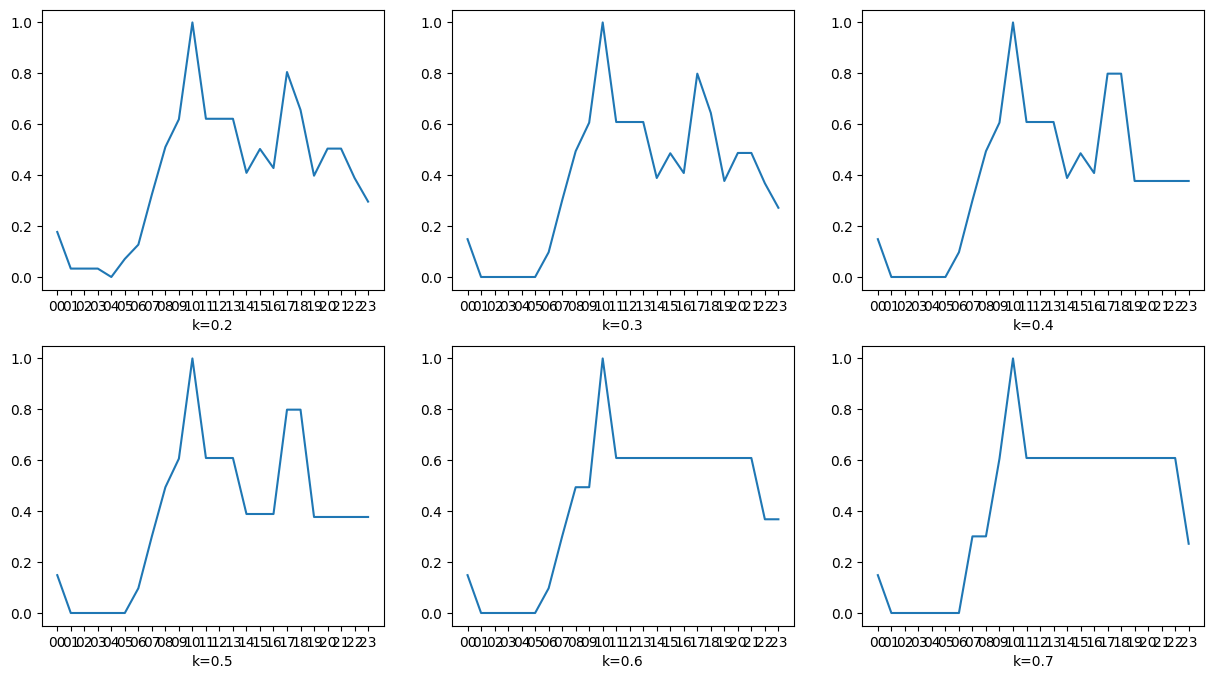

In [5]:
td = df.loc[:,'8317']
fig = plt.figure(figsize=(15,8))
for i in range(6):
    fig.add_subplot(2,3,i+1)
    k = i*0.1+0.2
    s = local_smoothing(td,k)
    plt.plot(local_smoothing(td,k))
    plt.xlabel('k='+str(round(k,2)))

In [6]:
# smoothing factor k is set 0.4 to avoid noise and loss of information
df = df.apply(lambda x:local_smoothing(x,k=0.4),axis=0)

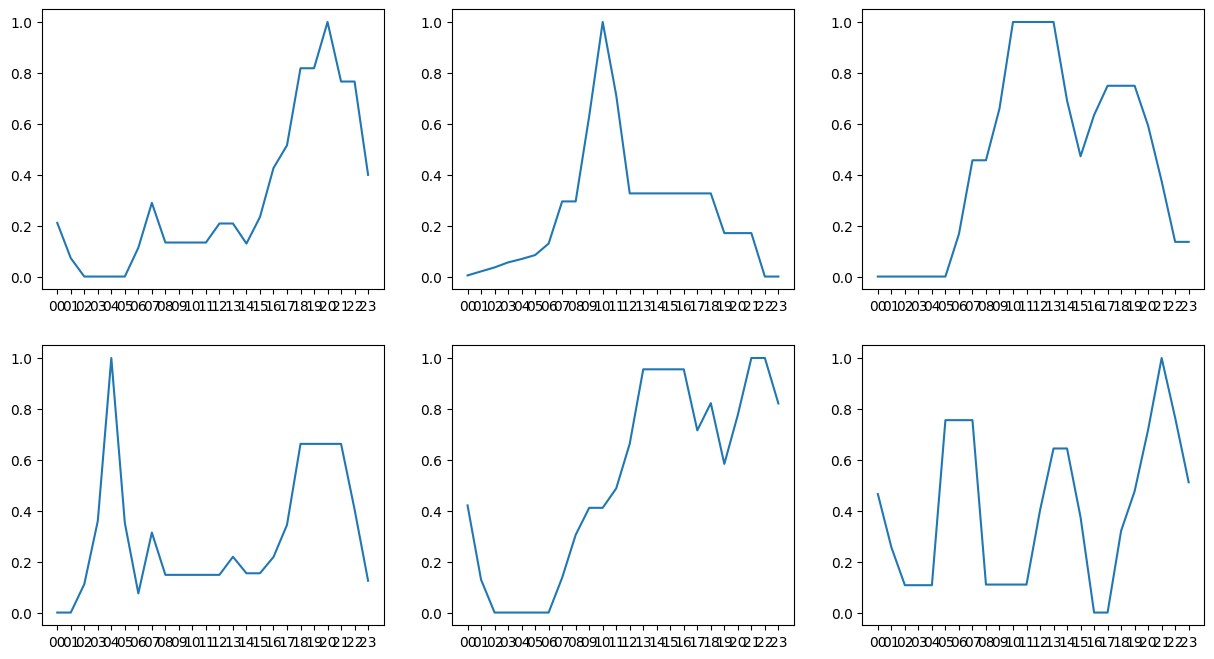

In [7]:
fig = plt.figure(figsize=(15,8))
for i in range(6):
    fig.add_subplot(2,3,i+1)
    plt.plot(df.iloc[:,i])

In [8]:
df = df.transpose()
df

hour,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
26,0.210815,0.072327,0.000000,0.000000,0.000000,0.000000,0.113403,0.289551,0.133667,0.133667,...,0.129517,0.234009,0.426270,0.515625,0.818359,0.818359,1.000000,0.766113,0.766113,0.399414
59,0.004513,0.020294,0.035889,0.055634,0.068970,0.084412,0.129639,0.295166,0.295166,0.629883,...,0.326660,0.326660,0.326660,0.326660,0.326660,0.170654,0.170654,0.170654,0.000000,0.000000
86,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166992,0.456787,0.456787,0.659668,...,0.691406,0.472412,0.634277,0.749512,0.749512,0.749512,0.592285,0.374756,0.136230,0.136230
114,0.000000,0.000000,0.111450,0.359863,1.000000,0.352051,0.075256,0.314209,0.148071,0.148071,...,0.154297,0.154297,0.218262,0.344482,0.662598,0.662598,0.662598,0.662598,0.405273,0.124878
370,0.420898,0.129028,0.000000,0.000000,0.000000,0.000000,0.000000,0.136963,0.305176,0.411377,...,0.955566,0.955566,0.955566,0.715820,0.822754,0.583984,0.776855,1.000000,1.000000,0.821289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175903,0.175903,...,0.359375,0.464111,0.607910,0.607910,1.000000,1.000000,0.808594,0.718262,0.648926,0.205078
8555,0.568848,0.400879,0.298096,0.188599,0.127808,0.127808,0.127808,0.157471,0.266846,0.440186,...,0.396240,0.000000,0.000000,0.000000,0.240356,0.532227,0.532227,0.758301,0.758301,0.546875
9434,0.040405,0.000000,0.000000,0.024292,0.001429,0.033264,0.363037,0.363037,0.776367,0.973145,...,0.449707,0.449707,0.449707,0.449707,0.449707,0.449707,0.449707,0.270020,0.072449,0.072449
9912,0.000000,0.098694,0.040192,0.216431,0.216431,0.216431,0.432861,0.526855,1.000000,1.000000,...,0.485352,0.341309,0.341309,0.527832,0.405762,0.839355,0.839355,0.839355,0.196655,0.196655


In [9]:
# df.to_pickle('df.pkl')

Now the dataframe is ready for clustering analysis.

# Clustering

## 1. Patitioning Methods

### 1.1 K-means clustering
Choosing k :
* Elbow Method using WSS
* Silhouette Method

In [9]:
from sklearn.cluster import KMeans

### Elbow Method

In [10]:
# calculating WSS
def calculate_WSS(df, km):
    '''
    df: data frame
    km: KMeans object 
    '''
    k = km.n_clusters
    centroids = km.cluster_centers_
    pred_clusters = km.predict(df)
    sse = 0

    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(df)):
        curr_center = centroids[pred_clusters[i]]   # predicted cluster of the current point
        sse += sum((df.iloc[i,:]-curr_center)**2)
    return sse

### Silhouette Method
The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

$s(i) = (b(i)-a(i)) / max\{(a(i),b(i)\} $ if $|C_i| > 1$.  
$s(i) = 0$ if $|C_i| = 1$. This is to prevent the number of clusters from increasing significantly with many single-point clusters.

$a(i)$ : similarity of the point i to its own cluster.  
$b(i)$ : dissimilarity of i from points in other clusters.

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
# simulation 
# try different seeds for each k and select the best one.
wss = []
sil = []
for k in range(4, 10):
    print('Number of clusters: ',k)
    sim_wss = []
    sim_sil = []
    for seed in range(20,40,1):
        km = KMeans(n_clusters = k, random_state = seed)
        km.fit(df)
        sim_wss.append(calculate_WSS(df, km))
        sim_sil.append(silhouette_score(df, km.labels_, metric = 'euclidean')) 
    wss.append(sim_wss)
    sil.append(sim_sil)

Number of clusters:  4
Number of clusters:  5
Number of clusters:  6
Number of clusters:  7
Number of clusters:  8
Number of clusters:  9


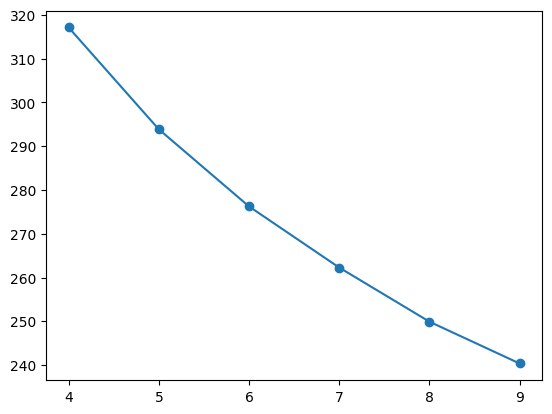

In [13]:
wss = np.array(wss)
min_wss = np.apply_along_axis(np.min, 1, wss)
plt.plot(range(4,10),min_wss,'-o')   # there's no clear elbow based on the elbow method

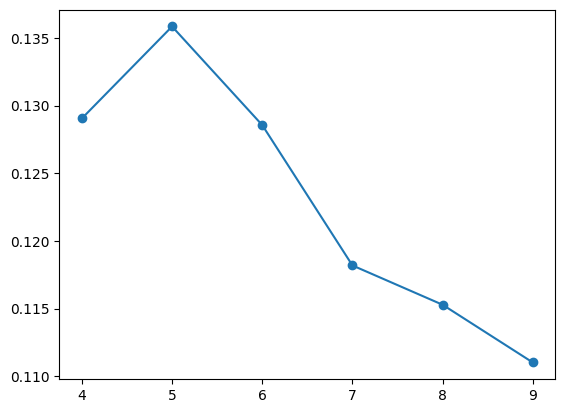

In [14]:
sil = np.array(sil)
min_sil = np.apply_along_axis(np.min, 1, sil)
plt.plot(range(4,10), min_sil,'-o')    # the silhouette method suggests five clusters

In [15]:
min_wss[1]  # WSS of 5 clusters

293.87062337886664

### 1.2 K-medoids

k-means clustering uses Euclidean distance and is therefore affected by outliers. Alternatively, k-medoids method is more robust in presence of noise and outliers, but also with higher computational cost.

A popular realization of k-medoids clustering is **Partitioning Around Medoids (PAM)** algorithm. 

In [17]:
# ! pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

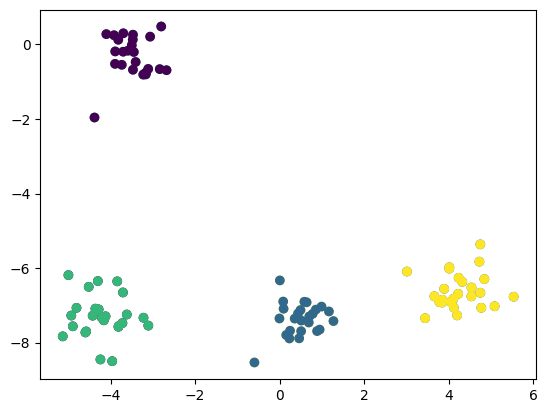

In [19]:
# demo on small dataset
# generate cluster data
from sklearn.datasets import make_blobs
features, true_clusters = make_blobs(n_samples = 100, n_features = 2, centers = 4, cluster_std = 0.5, shuffle = True)
clus_df = pd.DataFrame(features, columns=['f1','f2'])  
plt.scatter(features[:,0], features[:,1],c=true_clusters)

KMobj = KMedoids(n_clusters=4).fit(clus_df)
labels = KMobj.labels_
plt.scatter(features[:,0], features[:,1], c = labels.tolist())

In [20]:
# perform PAM on load profile
sil = []
wss = []
for k in range(4,10):
    km = KMedoids(n_clusters=k).fit(df)
    wss.append(calculate_WSS(df, km))
    sil.append(silhouette_score(df, km.labels_, metric = 'euclidean'))

Text(0.5, 0, 'within sum of square')

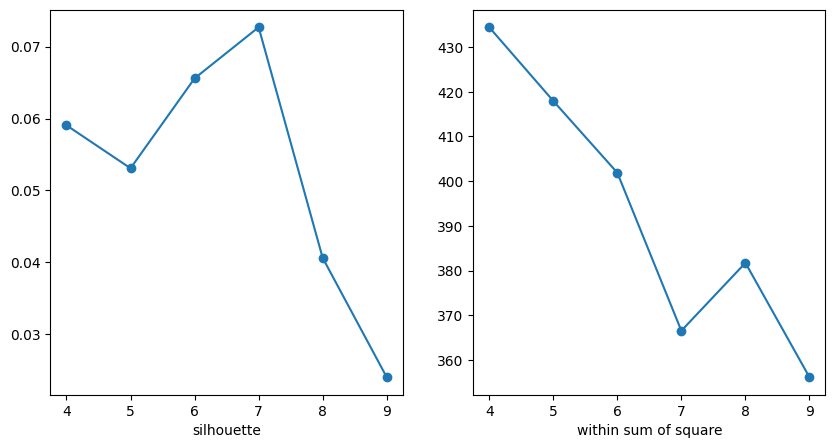

In [21]:
fig = plt.figure(figsize = (10,5))
fig.add_subplot(1,2,1)
plt.plot(range(4,10), sil,'-o')
plt.xlabel('silhouette')
fig.add_subplot(1,2,2)
plt.plot(range(4,10), wss,'-o')
plt.xlabel('within sum of square')

kmeans has higher silhouette score 

## 2. Hierarchical Methods

There are several categories in hierarchical clustering: 
* Agglomerative  (bottom-up / merging) : AGNES
* Divisive  (top-down / splitting) : DIANA
* Multiphase: BIRCH, Chameleon

Here we demonstrate AGNES and BIRCH algorithms.

### AGNES Algorithm

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [31.25, 31.25, 74.375, 74.375],
  [5.0, 5.0, 52.8125, 52.8125],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [172.5, 172.5, 200.0, 200.0],
  [133.75, 133.75, 186.25, 186.25],
  [115.0, 115.0, 160.0, 160.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [222.5, 222.5, 260.0, 260.0],
  [137.5, 137.5, 241.25, 241.25],
  [28.90625, 28.90625, 189.375, 189.375],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [290.0, 290.0, 312.5, 312.5],
  [355

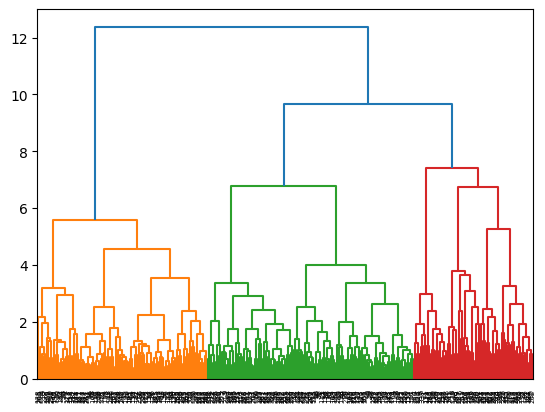

In [23]:
linkage_data = linkage(df, method='ward', metric='euclidean')
dendrogram(linkage_data)

In [24]:
def visualize_clusters(k,df):
    agg = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    labels = agg.fit_predict(df) 

    # visualize the clustered pattern
    df_agg = df.copy()
    df_agg['labels'] = labels
    vis = df_agg.groupby('labels').agg('mean')

    fig = plt.figure(figsize = (15,10))
    for i in range(len(vis)):
        fig.add_subplot(k//3+1,3,i+1)
        plt.plot(vis.iloc[i,:],'-')

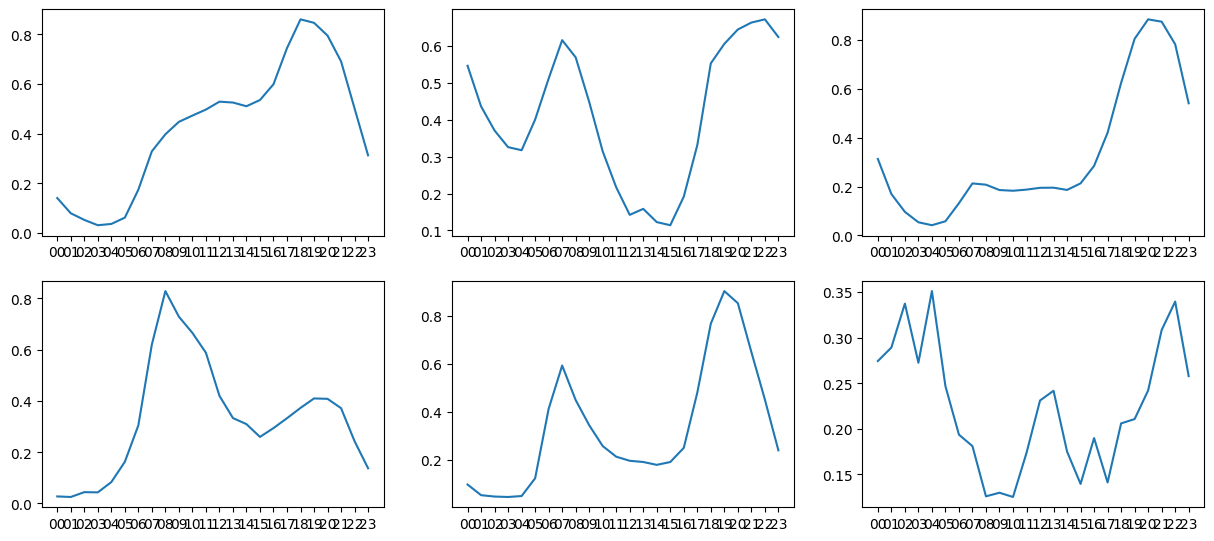

In [25]:
# according to the linkage data, 6,7,9 may be good choices for n_clusters
visualize_clusters(6,df)

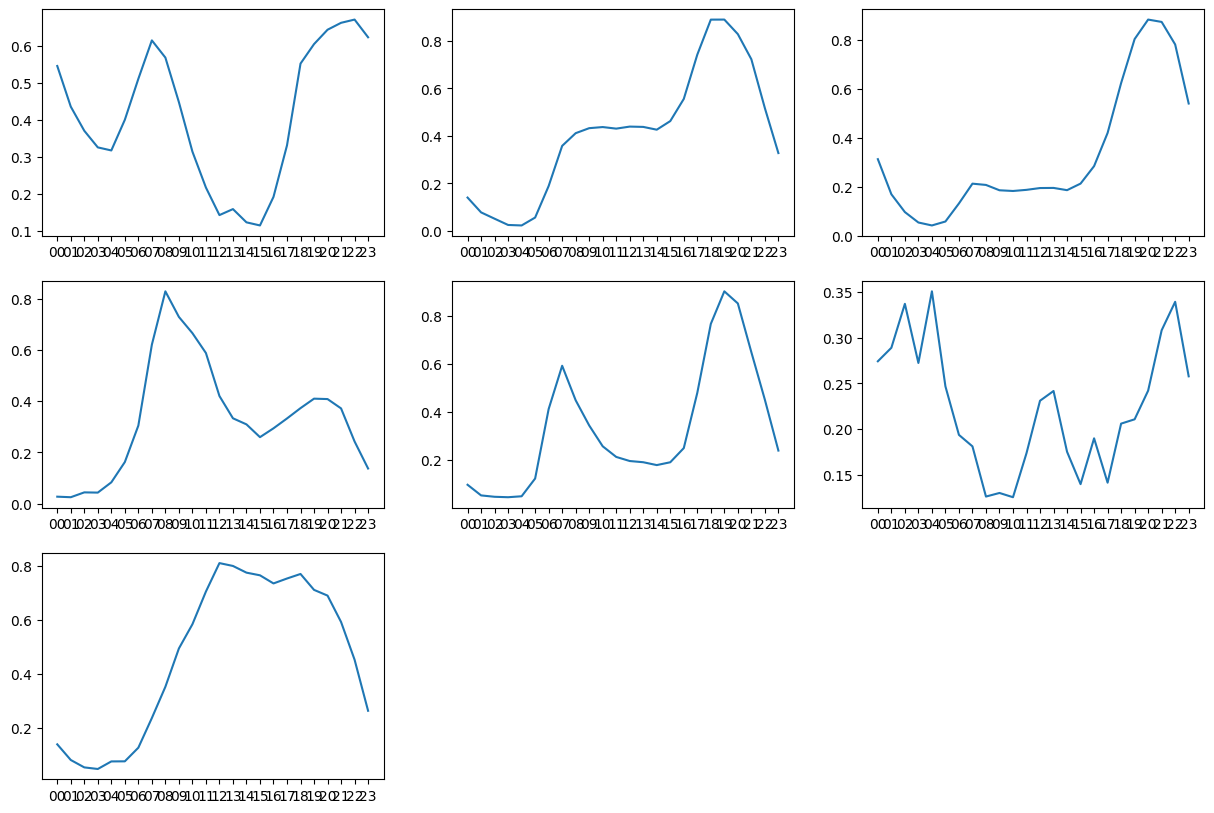

In [26]:
visualize_clusters(7,df)

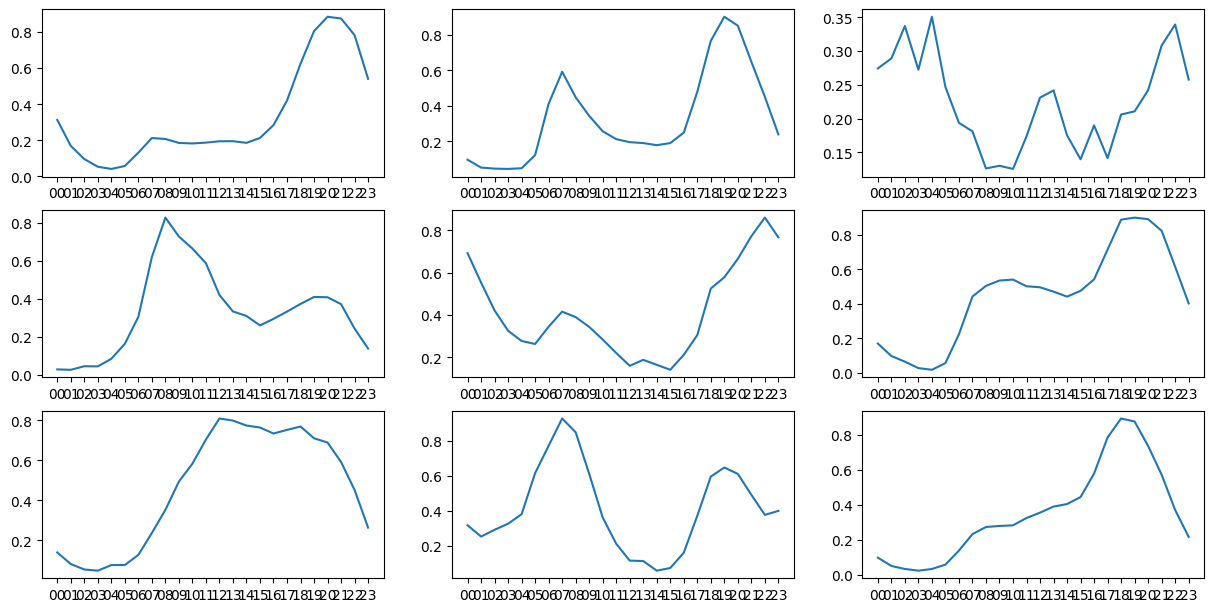

In [27]:
visualize_clusters(9,df)

Several patterns in the plot are similar (i.e., 1 and 9). It seems that six or seven clusters is enough.

In [28]:
# calculate WSS
def compute_centroids(df:pd.DataFrame,labels:list) -> np.array:
    data = df.copy()
    data['labels'] = labels
    centroids = data.groupby('labels').agg('mean')
    centroids = np.array(centroids)
    return centroids

In [29]:
def get_wss(df,labels):
    centroids = compute_centroids(df,labels)
    sse = 0
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(df)):
        curr_center = centroids[labels[i]]   # predicted cluster of the current point
        sse += sum((df.iloc[i,:]-curr_center)**2)
    return sse

In [30]:
k = 7
agg = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
labels = agg.fit_predict(df) 
get_wss(df,labels)  # kmeans has slightly better performance, which is around 260 for 6 clusters.

278.42611845650964

## BIRCH Algorithm

BIRCH uses the notions of **clustering feature** to summarize a cluster, and **clustering feature tree (CF-tree)** to represent a cluster hierarchy.

**CF** of a cluster is a 3-D statistics summarizing the information of the object. $CF=<n,LS,SS>$, where n is number of data, LS is the linear sum, SS is the square sum.

"A CF-Tree is a height-balanced tree that stores the clustering features for a hierarchical clustering." It contains two parameters:
* B(branching factor): maximum number of children per nonleaf node.
* T(threshold): maximum diameter of subclusters stored at the leaf nodes of the tree.

There are two phases of the BIRCH algorithm:
* Phase 1: Scan the database to built a CF tree. Assign the new point to the nearest CF(subcluster). If exceeding B/T, then split the CF. If memory required to store DF exceeds main memory, we can solve it by modifying the threshold.
* Phase 2: Applies a clustering algorithm to cluster the CF trees computed in phase 1. Generally, any partitioning algorithm will do.


Pros and Cons:
* Pros: scalability. can remove outliers.  
* Cons: final clusters may not be natural due to size of the node(B). produces spherical clusters due to use of LS and SS.

In [31]:
from sklearn.cluster import Birch

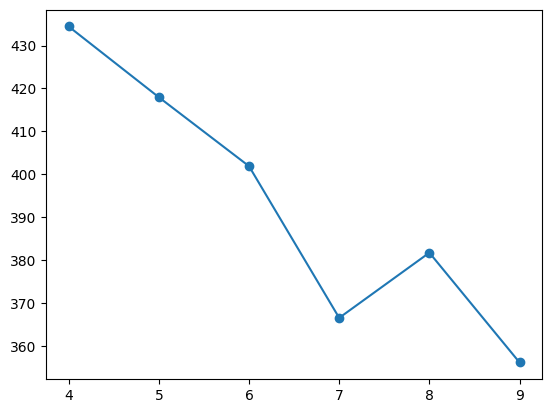

In [32]:
wss_b = []
for k in range(4,10,1):  
    bir = Birch(branching_factor = 50, threshold = 1, n_clusters = k)
    bir.fit(df)
    wss_b.append(get_wss(df,bir.labels_))
plt.plot(range(4,10),wss,'-o')

We can select k=7 using the elbow method. The shape resembles that of the AGNES algorithm. The overall result of hierarchical clustering is not as good as clusters generated by partition method. The electricity consumption patterns do not exhibit obvious hierarchical relationship, and we claim that k-means is more suitable for this dataset.

# 3. Density-based Methods

* DBSCAN
* OPTICS
* DENCLUE

Here we pick DBSCAN as a representative and use it to analyze the electricity data, and pick out possible outliers.

DBSCAN is known as **Density-Based Clustering Based on Connected Regions with High Density**. 

Pros and Cons:
* Pros: can handle nested clusters/clusters of any shape. can find outliers.
* Cons: need to determine **$\epsilon$** and **MinPts**, which may violate the true distribution.

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
for e in np.arange(0.3,1.8,0.1):
    db = DBSCAN(eps=e, min_samples=5).fit(df)
    print('e=',e, np.unique(db.labels_))

e= 0.3 [-1]
e= 0.4 [-1]
e= 0.5 [-1  0  1]
e= 0.6000000000000001 [-1  0]
e= 0.7000000000000002 [-1  0]
e= 0.8000000000000003 [-1  0  1]
e= 0.9000000000000001 [-1  0  1]
e= 1.0000000000000002 [-1  0]
e= 1.1000000000000003 [-1  0  1]
e= 1.2000000000000004 [-1  0  1]
e= 1.3000000000000005 [-1  0]
e= 1.4000000000000004 [-1  0]
e= 1.5000000000000004 [0]
e= 1.6000000000000005 [0]
e= 1.7000000000000004 [0]


In [35]:
db = DBSCAN(eps=1.2, min_samples=5).fit(df)
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0, -1

In [36]:
pd.DataFrame(db.labels_).value_counts()

 0    323
-1     11
 1      5
dtype: int64

The algorithm produces very few clusters. Due to variety of consumption pattern, it's hard to find electricity users that form dense a cluster of a particular shape, and **DBSCAN** tends to treat users with uncommon load profile as outliers. 

The purpose of the clustering load profile is to provide more efficient time sereis prediction of the electricity demand, therefore DBSCAN is not suitable for this task.

# Conclusion

We select k-means clustering with 5 clusters as our final choice, and use the average usage value per user within clusters to train our prediction model.

lowest WSS: 293.8394774551808, seed:51


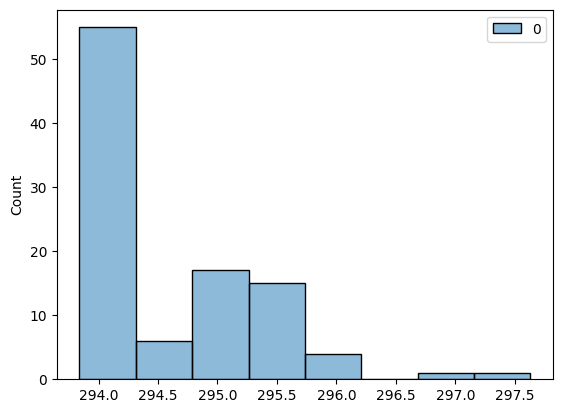

In [37]:
# Since k-means is not a deterministic algorithm, we use multiple seeds and select the clusters with lowest WSS.
sim_wss = {}
for seed in range(1,100,1):  
    km = KMeans(n_clusters = 5, random_state = seed)
    km.fit(df)
    sim_wss[seed] = calculate_WSS(df, km)
sns.histplot(sim_wss.values())
min_seed = min(sim_wss, key=sim_wss.get)
min_wss = sim_wss[min_seed]
print('lowest WSS: {}, seed:{}'.format(min_wss,min_seed))

In [38]:
km = KMeans(n_clusters = 5, random_state = 51)
km.fit(df)
pd.DataFrame(km.labels_).value_counts()

3    111
0     93
1     59
2     51
4     25
dtype: int64

In [39]:
cluster = pd.DataFrame(data = {'label':km.labels_}, index = df.index)

In [40]:
cluster

,label
26,3
59,4
86,0
114,3
370,0
...,...
9937,3
8555,1
9434,0
9912,0


# Prepare data for prediction

In [41]:
hourly_data = pd.read_pickle('hourly_data.pkl')
dat = hourly_data.transpose()
dat = dat.drop('hour')

In [43]:
dat = pd.merge(dat, cluster, left_index = True, right_index = True)
dat_pred = dat.groupby('label').agg('mean')

In [45]:
from datetime import datetime

In [46]:
# drop data of the last few days because less users are in it
# 2640 = 24*110 days
dat_pred = dat_pred.loc[:,dat_pred.columns < datetime(2016,4,20)]
dat_pred

,2016-01-01 00:00:00,2016-01-01 01:00:00,2016-01-01 02:00:00,2016-01-01 03:00:00,2016-01-01 04:00:00,2016-01-01 05:00:00,2016-01-01 06:00:00,2016-01-01 07:00:00,2016-01-01 08:00:00,2016-01-01 09:00:00,...,2016-04-19 14:00:00,2016-04-19 15:00:00,2016-04-19 16:00:00,2016-04-19 17:00:00,2016-04-19 18:00:00,2016-04-19 19:00:00,2016-04-19 20:00:00,2016-04-19 21:00:00,2016-04-19 22:00:00,2016-04-19 23:00:00
label,,,,,,,,,,,,,,,,,,,,,
0,61.873220,49.990104,44.570139,41.803168,40.641710,42.821441,48.956424,52.547396,61.527604,72.449002,...,69.143273,75.656382,91.246292,111.260064,100.217029,97.945312,95.725106,86.971133,81.889831,59.005297
1,68.859574,57.966499,53.056144,52.190148,50.031250,48.941472,49.696041,47.935911,50.391155,56.842360,...,54.629541,48.239844,52.168750,69.911914,80.749023,81.361523,94.566602,98.646680,104.058008,92.462891
2,64.163450,71.818857,62.878906,61.840227,62.133502,69.336703,81.362439,101.130515,114.178615,110.524203,...,39.398026,35.428865,46.998355,40.039885,57.417352,74.376234,71.671053,65.210938,66.986020,36.548109
3,52.838661,42.563790,43.763188,38.996560,41.146466,38.483945,38.754408,44.410981,52.373280,54.531537,...,44.121277,47.579773,54.371826,69.906738,105.550293,114.797180,108.977539,110.336060,83.884888,65.273926
4,94.670573,85.461263,55.282878,44.813802,113.249674,111.484049,74.604818,71.102865,77.427572,98.029785,...,64.653764,62.509233,53.334517,49.213778,99.255682,97.951349,103.032315,85.398793,82.215199,63.832031


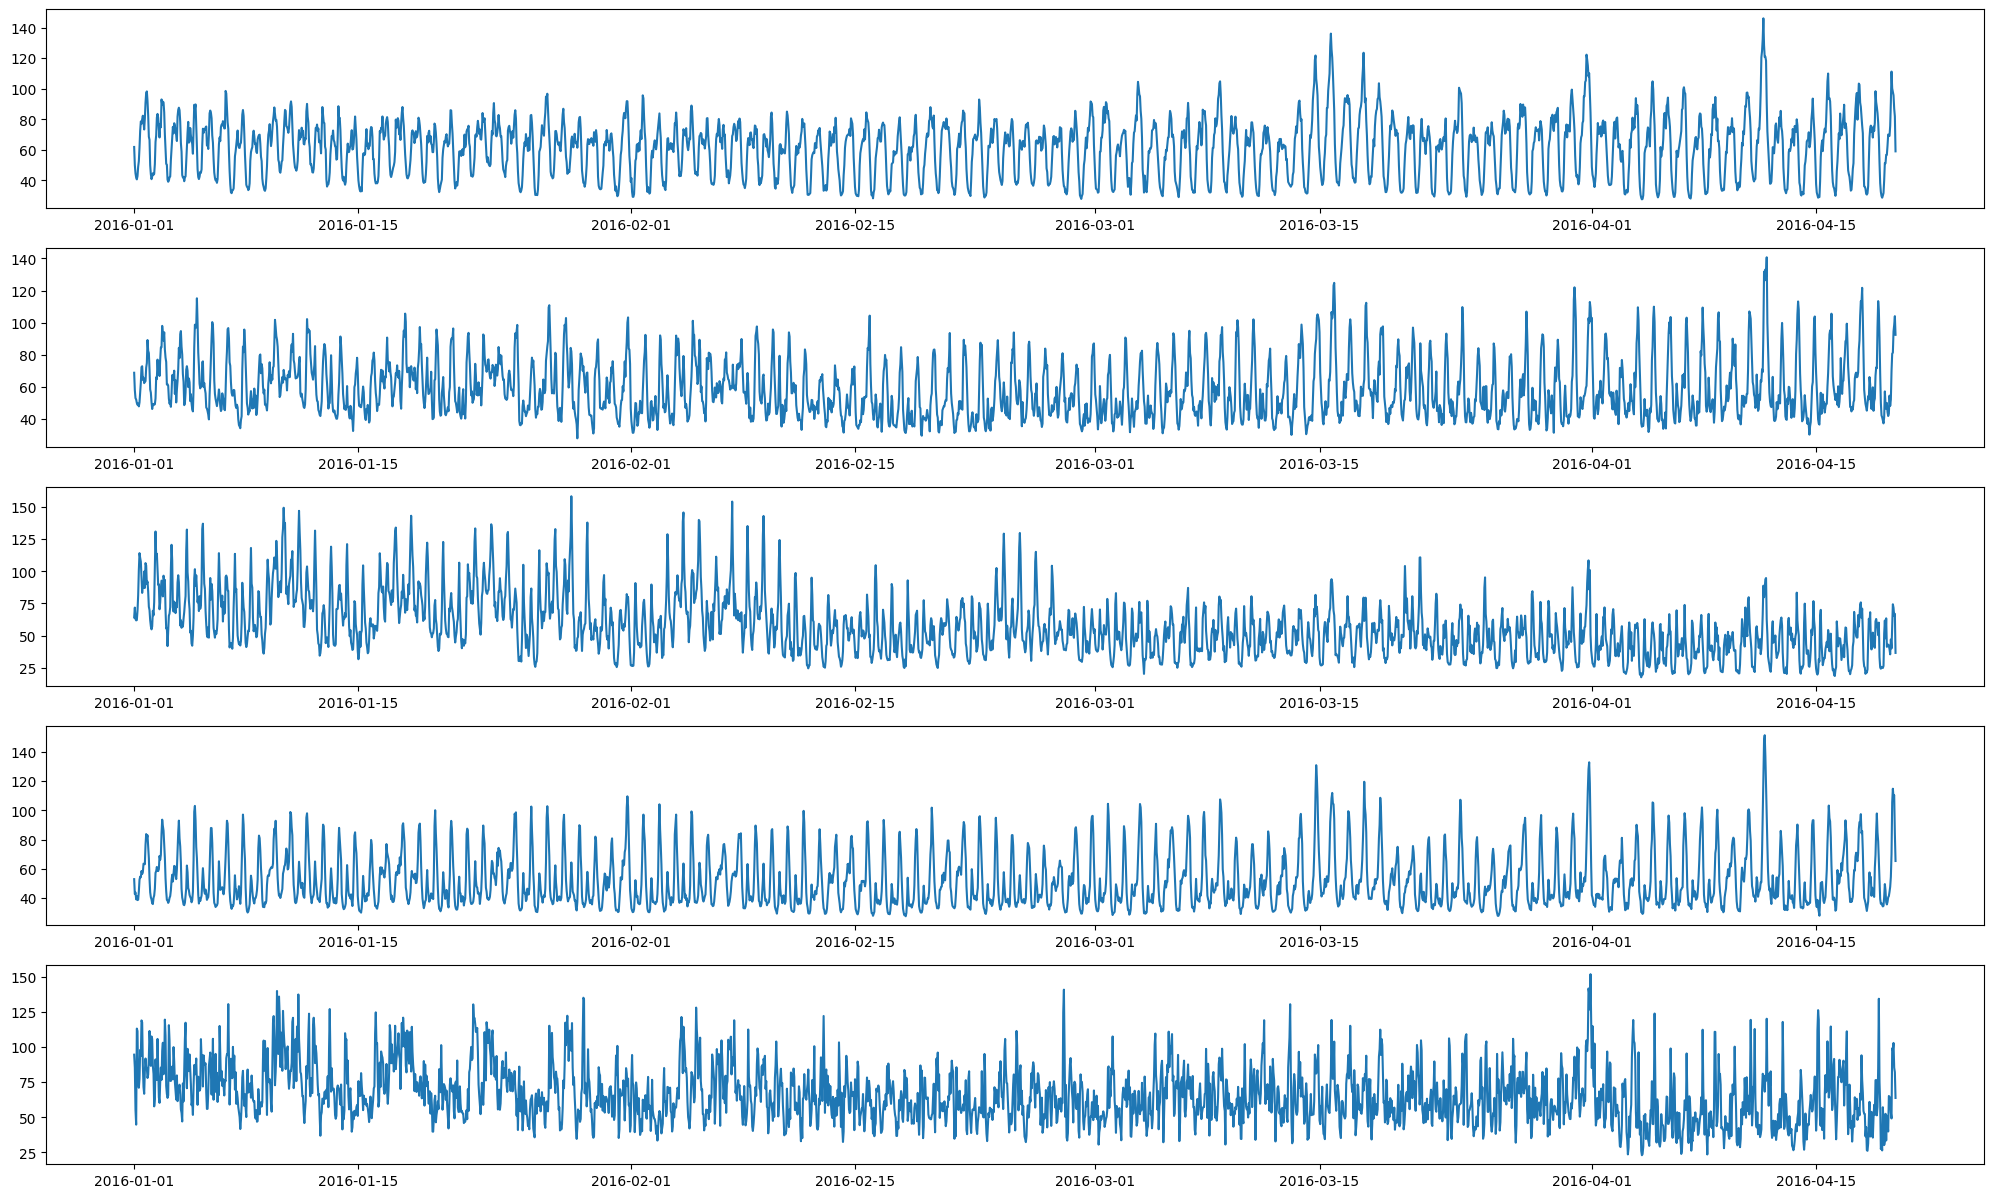

In [47]:
# sample plots
fig = plt.figure(figsize=(25,15))
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.plot(dat_pred.iloc[i,:])

In [48]:
dat_pred.to_csv('dat_pred.csv')